# Validate Risley Prism Scanner
Notebook: Hannah Weiser, 2023

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir
os.chdir(helios_path)

## Survey
Let us look at the XML files in the simulation. First, we investigate the survey XML file, `tls_livox.xml`. We see that we actually use a moving platform of type `linearpath` to simulate the static platform, as a way to configure the integration time.

In [2]:
Code(display_xml('data/surveys/demo/tls_livox_mid-40.xml'), language='xml')

<document>
    <survey name="tls_toyblocks_livox" scene="data/scenes/demo/box_scene.xml#box_scene" platform="data/platforms.xml#simple_linearpath" scanner="data/scanners_tls.xml#livox_mid-40">

        <leg>
        <!-- minimal leg 1: 0.01 m with speed of 0.05 m/s = 0.2 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="-10.01" y="-15.0" z="0.0" movePerSec_m="0.05" />
            <scannerSettings active="true" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="-10.0" y="-15.0" z="0.0" movePerSec_m="0.05" />
            <scannerSettings active="false" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" />
        </leg>
        
        <leg>
        <!-- minimal leg 2: 0.01 m with speed of 0.01 m/s = 1 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="-10.01" y="-15.0" z="0.0" movePerSec_m="0.01" />
            <scannerSettings active="true" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="-10.0" y="-15.0" z="0.0" movePerSec_m="0.01" />
            <scannerSettings active="false" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" />
        </leg>
        
        <leg>
        <!-- minimal leg 3: 0.01 m with speed of 0.005 m/s = 2 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="-10.01" y="-15.0" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="true" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="-10.0" y="-15.0" z="0.0" movePerSec_m="0.005" />
            <scannerSettings active="false" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" />
        </leg>
        
        <leg>
        <!-- minimal leg 4: 0.01 m with speed of 0.0025 m/s = 4 s integration time;
		     decrease movePerSec_m for longer integration time -->
            <platformSettings x="-10.01" y="-15.0" z="0.0" movePerSec_m="0.0025" />
            <scannerSettings active="true" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="-10.0" y="-15.0" z="0.0" movePerSec_m="0.0025" />
            <scannerSettings active="false" scanAngle_deg="35" pulseFreq_hz="100000" headRotatePerSec_deg="0" />
        </leg>
        
    </survey>
</document>

## Scanner

In [3]:
Code(display_xml('data/scanners_tls.xml', 'livox_mid-40'), language='XML')

<scanner id="livox_mid-40" accuracy_m="0.02" beamDivergence_rad="0.0027" name="Livox Mid-40" optics="risley" pulseFreqs_Hz="100000" pulseLength_ns="5" rangeMin_m="2" scanAngleMax_deg="19.2" scanAngleEffectiveMax_deg="19.2" rotorFreq1_Hz="7294" rotorFreq2_Hz="-4664" wavelength_nm="905">
				
		<FWFSettings beamSampleQuality="3" />
		<beamOrigin x="0" y="0" z="0">
			<rot axis="z" angle_deg="-90" />
		</beamOrigin>

		<headRotateAxis x="1" y="0" z="0" />
	</scanner>

## Scene

`box_scene` in `data/scenes/demo/box_scene.xml`:

In [4]:
Code(display_xml('data/scenes/demo/box_scene.xml', 'box_scene'))

<scene id="box_scene" name="box_scene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/box/box100.obj" />
            </filter>
        </part>
    </scene>

## Executing the Simulation

In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [5]:
!"run/helios.exe" data/surveys/demo/tls_livox_mid-40.xml -q
output_path = find_playback_dir("data/surveys/demo/tls_livox_mid-40.xml")

## The results 
Now we can display the point cloud (coloured by GPS Time).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Loading points from", Path(output_path).relative_to(helios_path).as_posix())

sp_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
sp_2 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
sp_3 = np.loadtxt(Path(output_path) / 'leg004_points.xyz')
sp_4 = np.loadtxt(Path(output_path) / 'leg006_points.xyz')

Loading points from output/tls_toyblocks_livox/2023-02-02_13-34-24


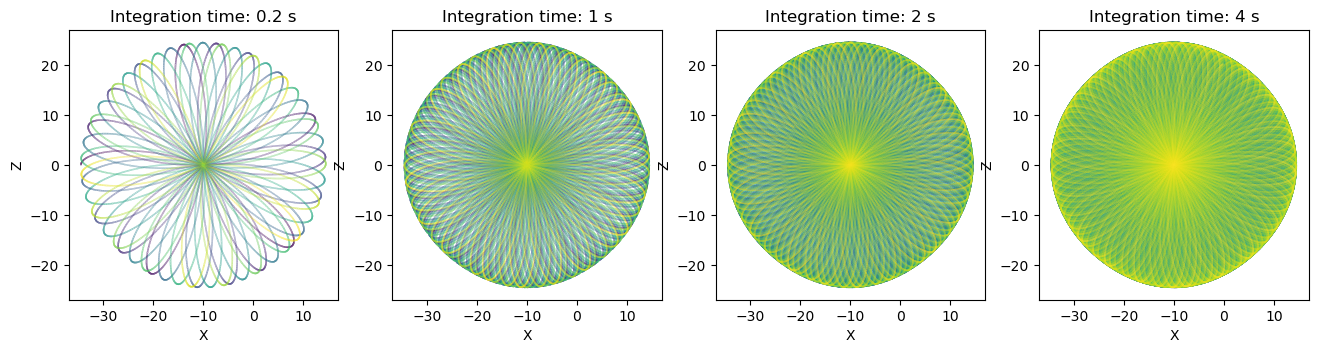

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 12))

ax1.scatter(sp_1[:, 0], sp_1[:, 2], s=0.01, c=sp_1[:, 10])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Integration time: 0.2 s")
ax1.set_aspect('equal', 'box')

ax2.scatter(sp_2[:, 0], sp_2[:, 2], s=0.01, c=sp_2[:, 10])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Integration time: 1 s")
ax2.set_aspect('equal', 'box')

ax3.scatter(sp_3[:, 0], sp_3[:, 2], s=0.01, c=sp_3[:, 10])
ax3.set_xlabel("X")
ax3.set_ylabel("Z")
ax3.set_title("Integration time: 2 s")
ax3.set_aspect('equal', 'box')

ax4.scatter(sp_4[:, 0], sp_4[:, 2], s=0.01, c=sp_4[:, 10])
ax4.set_xlabel("X")
ax4.set_ylabel("Z")
ax4.set_title("Integration time: 4 s")
ax4.set_aspect('equal', 'box')

plt.show()

## Compare with Real Point Cloud

In [8]:
test_pc = np.loadtxt(Path(helios_path) / "Mid-40-PointCloud-Time-4s.csv", delimiter=";", skiprows=1)

In [9]:
sp_4_spher = pyhelios.cartesianToSpherical(sp_4[:, :3])
sp_4_spher[:, 1:] = np.rad2deg(sp_4_spher[:, 1:])

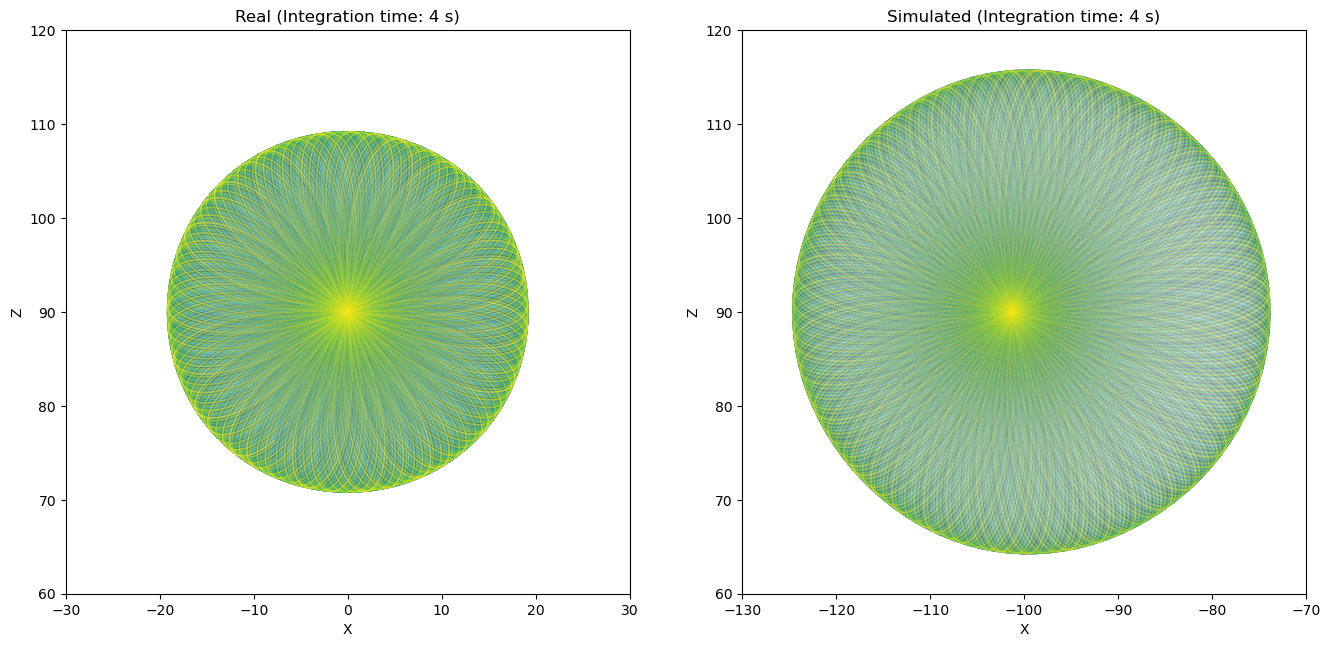

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12))

ax1.scatter(test_pc[:, 1], test_pc[:, 2], s=0.01, c=test_pc[:, 0])
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_title("Real (Integration time: 4 s)")
ax1.set_aspect('equal', 'box')
ax1.set_xlim(-30, 30)
ax1.set_ylim(60, 120)

ax2.scatter(sp_4_spher[:, 1], sp_4_spher[:, 2], s=0.01, c=sp_4[:, 10])
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_title("Simulated (Integration time: 4 s)")
ax2.set_aspect('equal', 'box')
ax2.set_xlim(-130, -70)
ax2.set_ylim(60, 120)

plt.show()

### Number of points

In [11]:
print(f"Real: {test_pc.shape[0]}")
print(f"Simulated: {sp_4_spher.shape[0]}")

Real: 400000
Simulated: 400001


### Time difference
Let's check if the integration time is the same for both

In [12]:
print(f"Real: {np.max(test_pc[:, 0])-np.min(test_pc[:, 0])}")
print(f"Real: {np.max(sp_4[:, 10])-np.min(sp_4[:, 10])}")

Real: 3.99999
Real: 4.0


While the number of points is the same, the field of view differs between the point clouds. This must be fixed.